# Information Retrieval in High Dimensional Data
## Lab 9

|     |     |
| --- | --- |
| **Name:** | Uzair Akbar |
| **Matriculation Number:** | 03697290 |
| **E-mail:** | [uzair.akbar@tum.de](mailto:uzair.akbar@tum.de) |

## Linear Discriminant Analysis
### Task 1
In this task, we will once again work with the MNIST training set as provided on Moodle. Choose three digit classes, e.g. 1, 2 and 3 and load `N=1000` images from each of the classes to the workspace. Store the data in a normalized matrix `X` of type size `(784,3*N)`. Furthermore, generate a color label matrix `C` of dimensions `(3,3*N)`. Each row of `C` assigns an RGB color vector to the respective column of X as an indicator of the digit class. Choose `[0, 0, 1]`, `[0, 1, 0]` and `[1, 0, 0]` for the three digit classes.

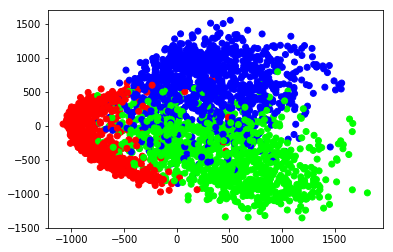

In [1]:
import numpy as np
import scipy.misc as scm
import matplotlib.pyplot as plt

N=1000
digit_prefix=['d1','d2','d3']
X=np.zeros((784,3*N))
C=np.zeros((3*N,3))
for i,dp in enumerate(digit_prefix):
    val_rgb=np.zeros((3,))
    val_rgb[i]=1.0
    for j in range(N):
        X[:,i*N+j]=np.float64(scm.imread('mnist/'+dp+'/'+dp+'_'+'%04d.png'%(j+1)).ravel())
        C[i*N+j]=val_rgb
        
mu=np.mean(X,axis=1)
X_c=X-np.expand_dims(mu,axis=1) # expand dims to ensure correct broadcasting

[U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)

Scores=np.expand_dims(Sigma,axis=1)*VT

#reorder indexes for visualization purposes
idx_new=((np.arange(3*N).reshape(3,N).T).reshape(N,3)).ravel()
plt.scatter(Scores[0,idx_new],Scores[1,idx_new],c=C[idx_new])
plt.show()

**a)** Generate a matrix `X_means` of size `(784,3)` which consists of the row-wise sums of the centered data samples belonging to each of the three classes, normalized by the square roots of the class sizes.  From `X_means`, compute the principal subspace `U_b` of dimension `2` and generate a `C`-colored `scatter` plot of the scores of `X` with respect to `U_b`. Compare the plot with the one from a). Which representation would you choose for a k-Nearest-Neighbors classification?

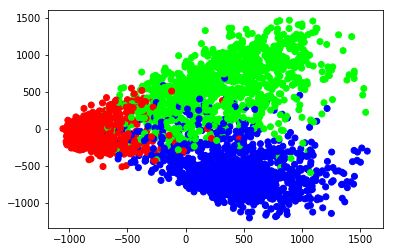

In [2]:
H=np.zeros((3*N,3))
H[:N,0]=1/np.sqrt(N); H[N:2*N,1]=1/np.sqrt(N); H[2*N:,2]=1/np.sqrt(N)

X_sums=np.dot(X_c,H)
[U_b,Sigma_b,V_bT]=np.linalg.svd(X_sums,full_matrices=False)

Scores_b=np.dot(U_b.T, X_c)
plt.scatter(Scores_b[0,idx_new],Scores_b[1,idx_new],c=C[idx_new])
plt.show()

**b)** Write a PYTHON function `sqrtminv` which expects a symmetric positive definite matrix `A` as its input and returns the inverse of its square root as its output, without using `scipy.linalg.sqrtm`.

In [3]:
def sqrtminv(A):
    A=(A+A.T)/2 # make sure it is really symmetric
    U,Sigma,_=np.linalg.svd(A)
    assert Sigma[-1]>0
    invSqrtSigma=1.0/np.sqrt(Sigma)
    return np.dot(U*invSqrtSigma,U.T)

**c)** Divide `X` into three matrices of sizes `(784,N)`, each containing the samples belonging to one of each of the classes. Center the three matrices to create `X1c`, `X2c` and `X3c` and compute the within-class Scatter matrix  `S_w=(np.dot(X1c,X1c.T)+np.dot(X2c,X2c.T)+np.dot(X3c,X3c.T))`.

In [4]:
X_1=X[:,:N]; X_2=X[:,N:2*N]; X_3=X[:,2*N:3*N]

X1c=X_1-np.expand_dims(np.mean(X_1,axis=1), 1)
X2c=X_2-np.expand_dims(np.mean(X_2,axis=1), 1)
X3c=X_3-np.expand_dims(np.mean(X_3,axis=1), 1)

S_w=(np.dot(X1c,X1c.T)+np.dot(X2c,X2c.T)+np.dot(X3c,X3c.T))

**d)** Calculate the "normalized class sum matrix" 
`S_bw=np.dot(sqrtminv(S_w),X_sums)` and the left singlar vectors `U_bw` corresponding to its `2` largest singular values. Create a `C`-colored `scatter` plot of the scores of `X` with respect to the subspace described by `sqrtminv(S_w)*U_bw` (Hint: orthogonolize the basis vectors). Compare the plot with the ones from a) and b). Which representation would you choose for a k-Nearest-Neighbor classification?

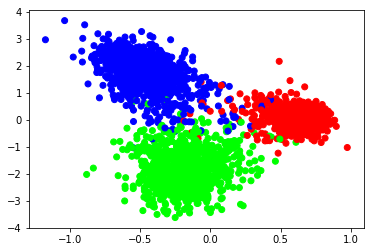

In [9]:
sqrtinvS_w=sqrtminv(S_w)
S_bw=np.dot(sqrtinvS_w,X_sums)

U_bw,_,_=np.linalg.svd(S_bw)
U_lda,_=np.linalg.qr(np.dot(sqrtinvS_w, U_bw))

Scores_lda=np.dot(U_lda.T,X_c)
plt.scatter(Scores_lda[0,idx_new],Scores_lda[1,idx_new],c=C[idx_new])
plt.show()

What weaknesses does this implementation of LDA have?

Here, the second basis vector is chosen according to (5.32) in the lecture notes. It is easy to implement, but does not follow any notion of optimality. Refer to the Section 5.2.1 in the lecture notes for possible alternatives.